<a href="https://colab.research.google.com/github/bestdiya/TASK7/blob/main/TASK7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Sales Summary ===
  product  total_qty  revenue
0   Apple         17      8.5
1  Banana         15      3.0
2  Orange         14      8.4


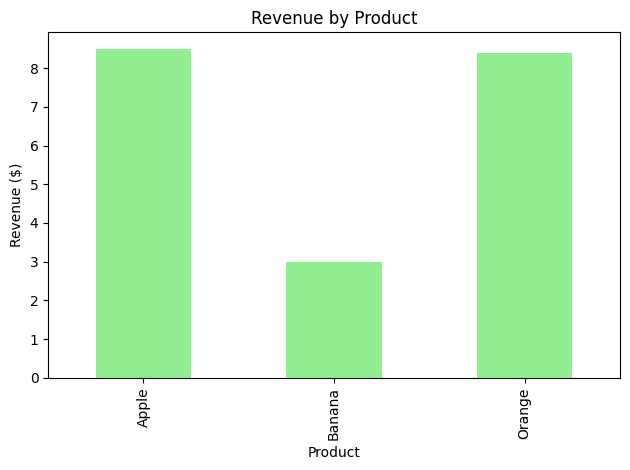

In [1]:
# Step 1: Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Connect to a SQLite database (file will be created in Colab environment)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 3: Create a table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 4: Insert sample data (comment out after first run)
sample_data = [
    ("Apple", 10, 0.5),
    ("Banana", 5, 0.2),
    ("Apple", 7, 0.5),
    ("Orange", 8, 0.6),
    ("Banana", 10, 0.2),
    ("Orange", 6, 0.6),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 5: Query sales summary
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# Step 6: Display results
print("=== Sales Summary ===")
print(df)

# Step 7: Plot
df.plot(kind='bar', x='product', y='revenue', legend=False, color='lightgreen')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

# Step 8: Close connection
conn.close()
